In [38]:
import requests
import pandas as pd

# Replace with your NREL API key
api_key = '0em4WgyMZMchBy87jXZjuQA2JndiAfJkbcjeEnQ3'

latitude = 36.77825
longitude = -119.417931

url = 'https://developer.nrel.gov/api/solar/solar_resource/v1.json'

params = {
    'api_key': api_key,
    'lat': latitude,
    'lon': longitude
}


response = requests.get(url, params=params)
data = response.json()

#print(data)

solar_data = data.get('outputs', {})
avg_dni = solar_data.get('avg_dni', {}).get('monthly', [])
avg_ghi = solar_data.get('avg_ghi', {}).get('monthly', [])
avg_lat_tilt = solar_data.get('avg_lat_tilt', {}).get('monthly', [])


month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
avg_dni_list = [avg_dni[month] for month in month_order]
avg_ghi_list = [avg_ghi[month] for month in month_order]
avg_tilt_list = [avg_lat_tilt[month] for month in month_order]

panel_area = 10  # in square meters
efficiency = 0.20  # 20% efficiency

#ghi for horizontally mounted panels
#dni for panels directly facing the sun
#tilt most preferred orientation for solar panels

annual_irradiance_tilt = sum(avg_tilt_list) * 365/12

annual_energy_output_tilt = annual_irradiance_tilt * panel_area * efficiency
annual_energy_output_tilt

4313.691666666667

In [21]:
print(avg_dni_list)
print(avg_ghi_list)
print(avg_tilt_list)

[3.23, 3.89, 4.09, 4.1, 4.16, 4.23, 4.32, 4.18, 4.1, 3.42, 2.79, 2.97]
[2.0, 2.89, 3.91, 4.77, 5.51, 5.85, 5.85, 5.17, 4.3, 3.03, 2.08, 1.75]
[3.61, 4.45, 4.92, 5.05, 5.24, 5.31, 5.46, 5.28, 5.1, 4.26, 3.44, 3.34]


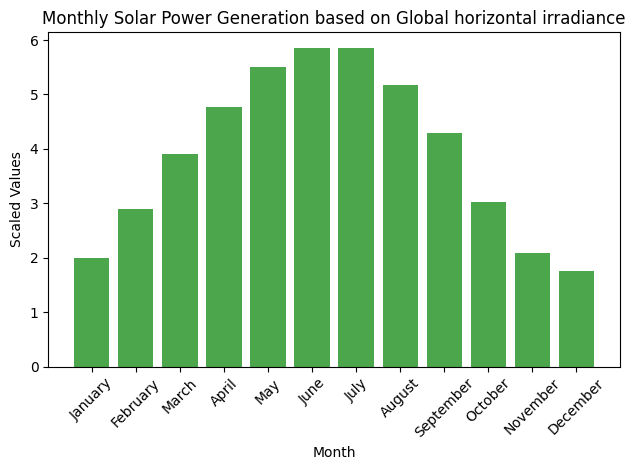

In [6]:
import matplotlib.pyplot as plt
import numpy as np

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
values = [2.0, 2.89, 3.91, 4.77, 5.51, 5.85, 5.85, 5.17, 4.3, 3.03, 2.08, 1.75] 

fig, ax = plt.subplots()

ax.bar(months, values, color='g', alpha=0.7)

ax.set_xlabel('Month')
ax.set_ylabel('Scaled Values')
ax.set_title('Monthly Solar Power Generation based on Global horizontal irradiance')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()